<a id="intro"></a>
<h2>   
      <font color = blue >
            <span style='font-family:Georgia'>
            1. Introduction:
            </span>   
        </font>    
</h2>

<h3>
    <font color="purple">
        <span style='font-family:Georgia'>
            Introduction:
        </span>
    </font>
</h3>
<p>
    <span style='font-family:Georgia'>
        This is a dataset about 500 patients of which 350 patients participated in a clinical trial. None of the patients were using Novodra (a popular injectable insulin) or Auralin (the oral insulin being researched) as their primary source of insulin before. All were experiencing elevated HbA1c levels.<br><br>
        All 350 patients were treated with Novodra to establish a baseline HbA1c level and insulin dose. After 4 weeks, which isn’t enough time to capture all the change in HbA1c that can be attributed by the switch to Auralin or Novodra:<br>
        <li> 175 patients switched to Auralin for 24 weeks</li>
        <li> 175 patients continued using Novodra for 24 weeks</li>
        Data about patients feeling some adverse effects is also recorded.
    </span>
</p>

<h3>
    <font color="purple">
        <span style='font-family:Georgia'>
            Business Objectives:
        </span>
    </font>
</h3>
<p>
    <span style='font-family:Georgia'>
        The primary business objectives of this analysis are:
    </span>
</p>
<ul>
    <li>
        <span style='font-family:Georgia'>
        <b>Identify Key Drivers:</b> To determine the main factors influencing the bmi of audio content on the Audible platform. This includes analyzing various attributes such as assigned_sex, rating, duration, and release date to understand their impact on pricing.
        </span>
    </li>
    <li>
        <span style='font-family:Georgia'>
        <b>Predictive Modeling:</b> To develop predictive models that can accurately forecast the bmi of new audio content based on historical data and identified key drivers. This will aid in strategic pricing decisions and competitive market positioning.
        </span>
    </li>
</ul>
<p>
    <span style='font-family:Georgia'>
        By achieving these objectives, we aim to enhance the decision-making process, optimize pricing strategies, and ultimately improve profitability and customer satisfaction on the Audible platform. Understanding these dynamics will also provide valuable insights for content creators and marketers in tailoring their offerings to meet market demands effectively.
    </span>
</p>

<a id="libraries"></a>
<h2>   
      <font color = blue >
            <span style='font-family:Georgia'>
            2. Getting Jupyter Ready:
            </span>   
        </font>    
</h2>

<div class="alert alert-block alert-success">
    <span style='font-family:Georgia'>
        <b>Requirments: </b><br>
        <ol>
            <li><b>pandas</b>  ==  2.2.2 </li>
            <li><b>numpy</b>  ==  1.26.3 </li>
            <li><b>matplotlib</b>  ==  3.8.3 </li>
            <li><b>seaborn</b>  ==   0.13.2 </li>
            <li><b>plotly</b>  ==   5.18.0 </li>
        </ol>
    </span>    
</div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import pickle

plt.style.use('seaborn-v0_8-darkgrid')
plt.style.use('fivethirtyeight')

<h3 name='libraries'>   
      <font color = purple >
            <span style='font-family:Georgia'>
            2.2 Adjust Jupyer Views:
            </span>   
        </font>    
</h3>

In [2]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',50)

<h3 name='libraries'>   
      <font color = purple >
            <span style='font-family:Georgia'>
            2.3 Supress Warnings:
            </span>   
        </font>    
</h3>

In [30]:
import warnings
warnings.filterwarnings('ignore')

<a id="import"></a>
<h2>   
      <font color = blue >
            <span style='font-family:Georgia'>
            3. Reading & Understanding the data
            </span>   
        </font>    
</h2>

- `patient_id`: the unique identifier for each patient in the Master Patient Index (i.e. patient database) of the pharmaceutical company that is producing Auralin
- `assigned_sex`: the assigned sex of each patient at birth (male or female)
- `given_name`: the given name (i.e. first name) of each patient
- `surname`: the surname (i.e. last name) of each patient
- `address`: the main address for each patient
- `city`: the corresponding city for the main address of each patient
- `state`: the corresponding state for the main address of each patient
- `zip_code`: the corresponding zip code for the main address of each patient
- `country`: the corresponding country for the main address of each patient (all United states for this clinical trial)
- `contact`: phone number and email information for each patient
- `birthdate`: the date of birth of each patient (month/day/year). The inclusion criteria for this clinical trial is age >= 18 (there is no maximum age because diabetes is a growing problem among the elderly population)
- `weight`: the weight of each patient in pounds (lbs)
- `height`: the height of each patient in inches (in)
- `bmi`: the Body Mass Index (BMI) of each patient. BMI is a simple calculation using a person's height and weight. The formula is BMI = kg/m2 where kg is a person's weight in kilograms and m2 is their height in metres squared. A BMI of 25.0 or more is overweight, while the healthy range is 18.5 to 24.9. The inclusion criteria for this clinical trial is 16 >= BMI <= 38.

<a id="input"></a>
<h3 name='libraries'>   
      <font color = purple >
            <span style='font-family:Georgia'>
            3.1 Importing the input files
            </span>   
        </font>    
</h3>

In [6]:
df = pickle.load(open(r"D:\CampMain\DSMP 1.0\2) Python\3) Data analysis Process\02) week 12\01) Data Assessing and Cleaning\06 clinical_trails\clinical_trials.pickle","rb"))

In [7]:
data = df.copy()

<a id="inspect"></a>
<h3 name='libraries'>   
      <font color = purple >
            <span style='font-family:Georgia'>
            3.2 Inspect Data Frames
            </span>   
        </font>    
</h3>

In [8]:
data.head()

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,birthdate,weight_lbs,height_in,bmi,phone_number,email,hba1c_start,hba1c_end,hba1c_change,type,dosage_start,dosage_end,adverse_reaction
0,1,female,Zoe,Wellish,576 Brown Bear Drive,Rancho California,CA,92390,United States,1976-07-10,121.7,66,19.6,951-719-9170,ZoeWellish@superrito.com,7.71,7.30,0.41,novodra,33.0,33.0,Other
1,2,female,Pamela,Hill,2370 University Hill Road,Armstrong,IL,61812,United States,1967-04-03,118.8,66,19.2,+1 (217) 569-3204,PamelaSHill@cuvox.de,9.53,9.10,0.43,novodra,27.0,29.0,Other
2,4,male,Liêm,Phan,2335 Webster Street,Woodbridge,NJ,07095,United States,1951-07-26,220.9,70,31.7,+1 (732) 636-8246,PhanBaLiem@jourrapide.com,7.58,7.10,0.48,novodra,43.0,48.0,Other
3,6,male,Rafael,Costa,1140 Willis Avenue,Daytona Beach,FL,32114,United States,1931-08-31,183.9,70,26.4,386-334-5237,RafaelCardosoCosta@gustr.com,7.73,7.34,0.39,auralin,50.0,60.0,Other
4,7,female,Mary,Adams,3145 Sheila Lane,Burbank,NV,84728,United States,1969-11-19,146.3,65,24.3,775-533-5933,MaryBAdams@einrot.com,7.65,7.26,0.39,novodra,32.0,33.0,Other


<a id="shape"></a>
<h4 name='libraries'>   
      <font color = orange >
            <span style='font-family:Georgia'>
            3.2.1 shape and size
            </span>   
        </font>    
</h4>

In [9]:
# Database dimension
print("Database dimension     :",data.shape)
#Database size
print("Database size -         :",data.size)

Database dimension     : (344, 22)
Database size -         : 7568


<a id="duplicated"></a>
<h4 name='libraries'>   
      <font color = orange >
            <span style='font-family:Georgia'>
            3.2.2 info
            </span>   
        </font>    
</h4>

In [10]:
data.info(verbose= True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   patient_id        344 non-null    int64         
 1   assigned_sex      344 non-null    category      
 2   given_name        344 non-null    object        
 3   surname           344 non-null    object        
 4   address           344 non-null    object        
 5   city              344 non-null    object        
 6   state             344 non-null    object        
 7   zip_code          344 non-null    object        
 8   country           344 non-null    object        
 9   birthdate         344 non-null    datetime64[ns]
 10  weight_lbs        344 non-null    float64       
 11  height_in         344 non-null    int64         
 12  bmi               344 non-null    float64       
 13  phone_number      338 non-null    object        
 14  email             338 non-

<a id="duplicated"></a>
<h4 name='libraries'>   
      <font color = orange >
            <span style='font-family:Georgia'>
            3.2.3 describe
            </span>   
        </font>    
</h4>

In [11]:
data.describe(include='all').transpose()

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
patient_id,344.0,NaN,NaN,NaN,255.311047,1.0,132.75,258.5,377.25,502.0,145.330163
assigned_sex,344,2,female,176,NaN,NaN,NaN,NaN,NaN,NaN,NaN
given_name,344,333,David,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
surname,344,328,Hueber,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
address,344,339,No Data,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
city,344,262,New York,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
state,344,47,CA,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zip_code,344,308,00000,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,344,2,United States,338,NaN,NaN,NaN,NaN,NaN,NaN,NaN
birthdate,344,NaN,NaN,NaN,1958-06-11 04:27:54.418604672,1922-01-05 00:00:00,1936-07-20 00:00:00,1957-10-01 00:00:00,1979-11-06 06:00:00,1999-07-03 00:00:00,NaN


<a id="duplicated"></a>
<h4 name='libraries'>   
      <font color = orange >
            <span style='font-family:Georgia'>
            3.2.4 types
            </span>   
        </font>    
</h4>

In [12]:
categorical_columns = ['assigned_sex','city', 'state', 'country', 'type', 'adverse_reaction']

numerical_columns = ['weight_lbs', 'height_in', 'bmi', 'hba1c_change']

mixed = ['patient_id', 'given_name', 'surname', 'address', 'zip_code', 'phone_number', 'email']

date = ['birthdate']

<a id="duplicated"></a>
<h4 name='libraries'>   
      <font color = orange >
            <span style='font-family:Georgia'>
            3.2.5 duplicated
            </span>   
        </font>    
</h4>

In [13]:
data['email'].nunique()


338

In [14]:
data['email'].duplicated().sum()

5

<a id="duplicated"></a>
<h4 name='libraries'>   
      <font color = orange >
            <span style='font-family:Georgia'>
            3.2.6 missing
            </span>   
        </font>    
</h4>

In [15]:
def check_missing(df):
    X = (df.isnull().sum() / df.shape[0] ).mul(100).round(2).sort_values(ascending=False).reset_index().rename(columns={'index':'feature',0:'missing_percentage'})
    return X[X['missing_percentage']>0]


check_missing(data)

,feature,missing_percentage
0,email,1.74
1,phone_number,1.74


<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>phone_number and email are missing.
    </span>    
</div>


<a id="clean"></a>
<h2>   
      <font color = blue >
            <span style='font-family:Georgia'>
            4. Analyzing the data
            </span>   
        </font>    
</h2>


<h3>
    <font color="purple">
        <span style='font-family:Georgia'>
            Steps of doing Univariate Analysis on Numerical columns:
        </span>
    </font>
</h3>

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def outliers_detect(column):
    # Calculate the first quartile (Q1)
    Q1 = column.quantile(0.25)
    # Calculate the third quartile (Q3)
    Q3 = column.quantile(0.75)
    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1
    # Define the lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Find outliers
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    if outliers.empty:
        return 0
    else:
        return len(outliers)

def univariate_num(df, target_col, bin=20, hist_color=None, kde_color=None, box_color=None, figsize=(20, 12)):
    # Separate data into premium and non-premium
    data = df.copy()

    plt.figure(figsize=figsize)
    sns.histplot(data=data, x=target_col,  bins=bin, stat='density', color=hist_color)
    sns.kdeplot(data=data, x=target_col, color=kde_color)
    plt.title(f'Histogram - {target_col}')
    plt.xlabel(target_col)
    plt.ylabel('Density')
    plt.tight_layout()
    plt.show()

    sns.boxplot(data=data, x=target_col,  color=box_color, orient='h')
    plt.title(f'Box Plot - {target_col}')
    plt.xlabel(target_col)
    
    outliers = outliers_detect(data[target_col])
    print(f"Skewness of {target_col}: ", data[target_col].skew())
    print(f"Kurtosis of {target_col}: ", data[target_col].kurt() + 3)
    print(f"Outliers in {target_col}: ", outliers)
    print()

    plt.tight_layout()
    plt.show()

    print('\n'*4)

In [17]:
print(numerical_columns)

['weight_lbs', 'height_in', 'bmi', 'hba1c_change']


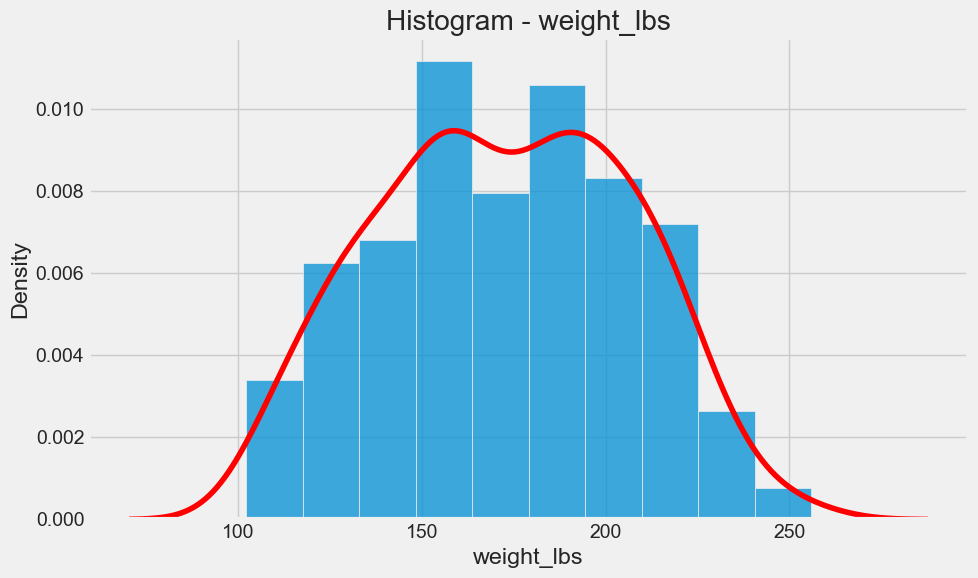

Skewness of weight_lbs:  -0.002940601994481679
Kurtosis of weight_lbs:  2.1768431094841434
Outliers in weight_lbs:  0



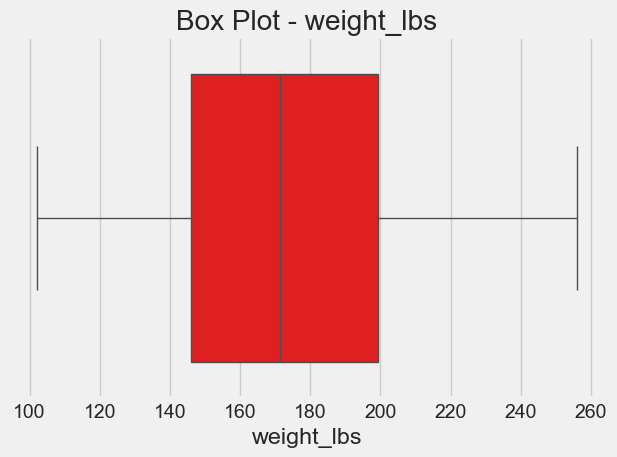

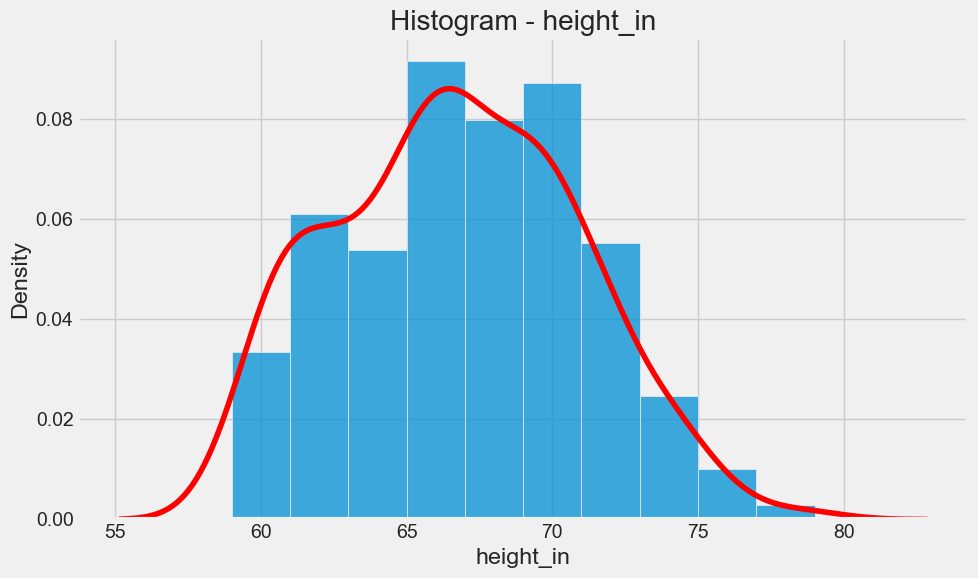

Skewness of height_in:  0.15019376693677086
Kurtosis of height_in:  2.4118741050338297
Outliers in height_in:  0



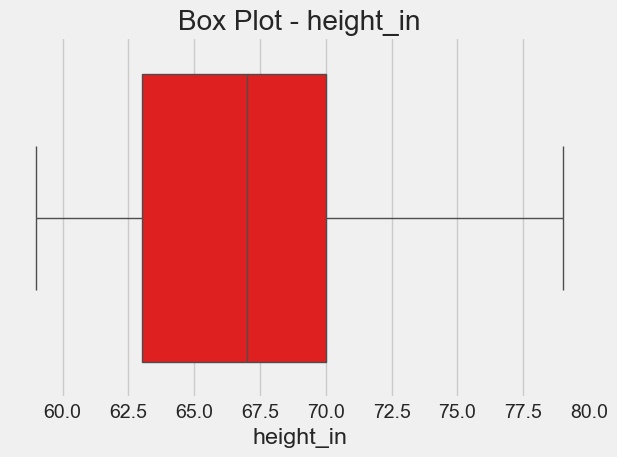

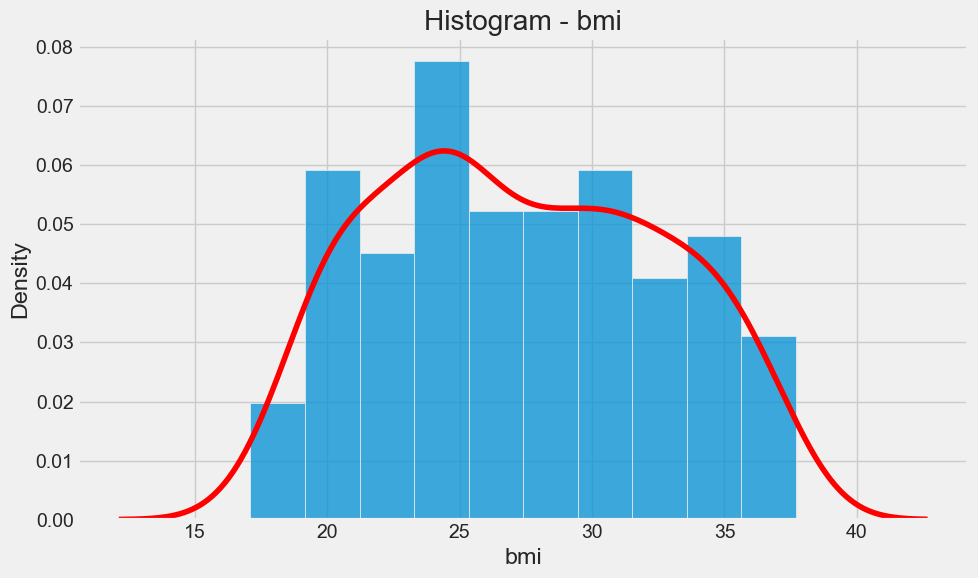

Skewness of bmi:  0.11663143854859082
Kurtosis of bmi:  1.9313074754099908
Outliers in bmi:  0



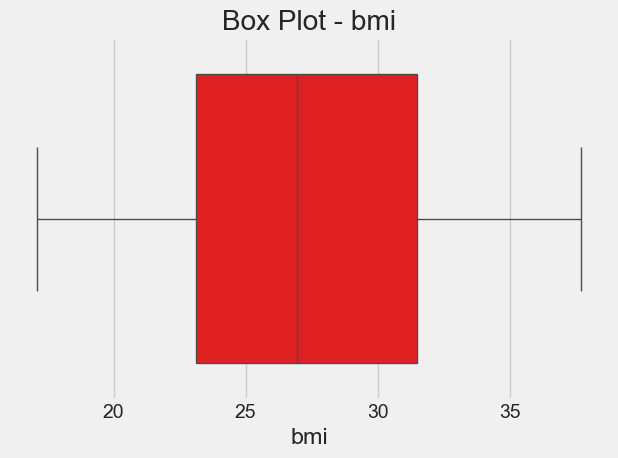

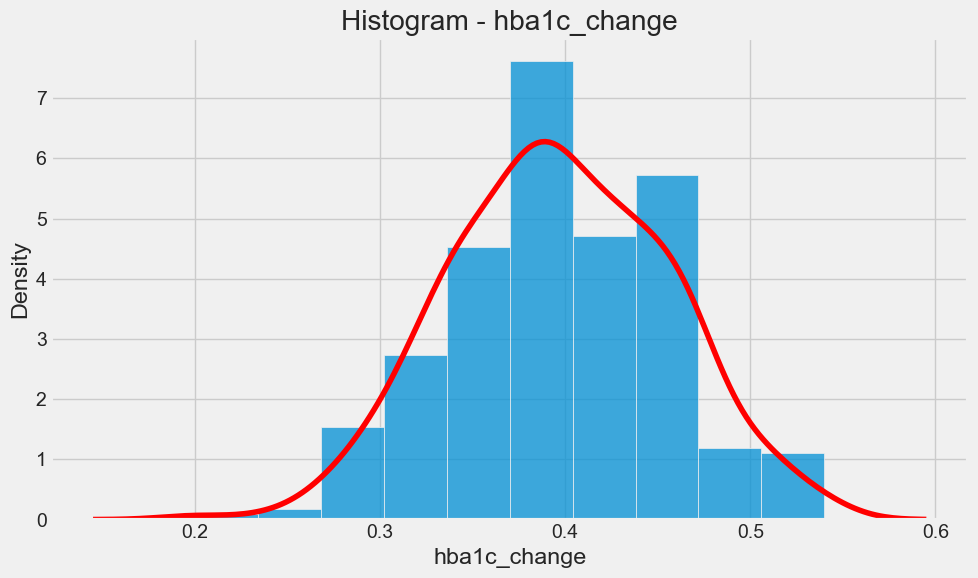

Skewness of hba1c_change:  -0.04866919394846548
Kurtosis of hba1c_change:  2.7852993579383134
Outliers in hba1c_change:  1



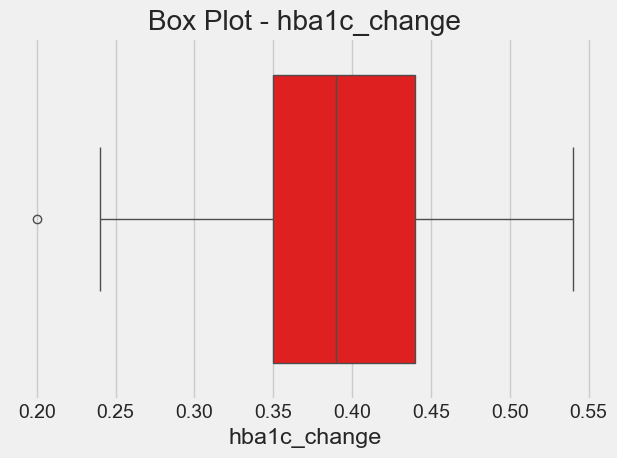

In [18]:
for col in numerical_columns:
        univariate_num(data, target_col=col, bin=10, figsize=(10, 6), kde_color='red', box_color='red')

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>
        <ul>
            <li>
                <b>weight_lbs:</b> The weight_lbs distribution is symmetric with a skewness of -0.02 and a kurtosis of 2.20. There are 0 outliers in the bmi data, indicating a relatively normal and consistent distribution across the dataset.
            </li>
            <li>
                <b>height_in:</b> The height_in distribution also shows a positive skewness of 0.11 and a kurtosis of 2.45, which is approximately a normal distribution. However, there are 0 outliers in the rating_stars data.
            </li>
            <li>
                <b>time_mins:</b> The time_mins distribution exhibits a notable less positive skewness of 0.06 and a kurtosis of 1.93, indicating approximately a normal distribution. The presence of 0 outliers.
            </li>
            <li>
                <b>hba1c_change:</b> The hba1c_change distribution exhibits a notable less negative skewness of  -0.04 and a kurtosis of 2.78, indicating approximately a normal distribution. The presence of 1 outliers.
            </li>
        </ul>
    </span>   
</div>


<a id="univariate"></a>
<h3>   
      <font color = purple >
            <span style='font-family:Georgia'>
            4.1.2 Univariate Analysis on Categorical Columns
            </span>   
        </font>    
</h3>

In [19]:
def univariate_cat(col, bar_head=2, pie_head=2, colors=['r', 'b', 'g', 'y', 'm', 'c', 'k'], figsize=(10, 6)):
    # Get value counts
    value_counts = col.value_counts()
    top_bar = value_counts.head(bar_head)
    top_pie = value_counts.head(pie_head)

    # Adjust colors if there are more categories than predefined colors
    if len(top_bar) > len(colors):
        colors = sns.color_palette("hsv", len(top_bar))
    
    # Convert value counts to DataFrame for easier handling with hue
    top_bar_df = top_bar.reset_index()
    top_bar_df.columns = [col.name, 'counts']
    
    # Bar plot
    plt.figure(figsize=figsize)
    ax = sns.barplot(data=top_bar_df, x=col.name, y='counts', hue=col.name, palette=colors[:len(top_bar)], dodge=False, legend=False)
    
    for p in ax.patches:
        ax.annotate(np.round(p.get_height(), decimals=2), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', 
                    va='center', 
                    xytext=(0, 10), 
                    textcoords='offset points')
        
    plt.title(f'Bar plot - {col.name}')
    plt.xlabel(col.name)
    plt.ylabel('Frequency')
    plt.show()

    # Pie plot
    top_pie.plot(kind='pie', 
                 autopct='%0.1f%%', 
                 colors=colors[:len(top_pie)], 
                 figsize=figsize, 
                 legend=True)
    
    plt.title(f'Pie plot - {col.name}')
    plt.ylabel('')
    plt.show()
    print("\n" * 3)

    return 

In [20]:

print(categorical_columns)

['assigned_sex', 'city', 'state', 'country', 'type', 'adverse_reaction']


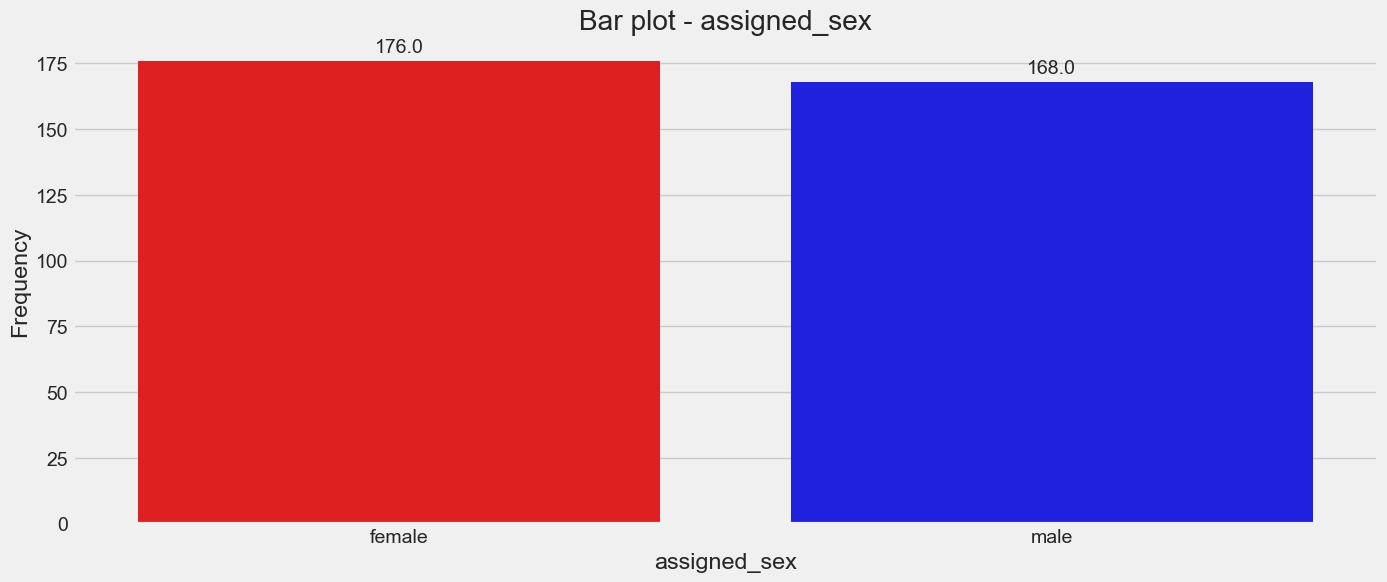

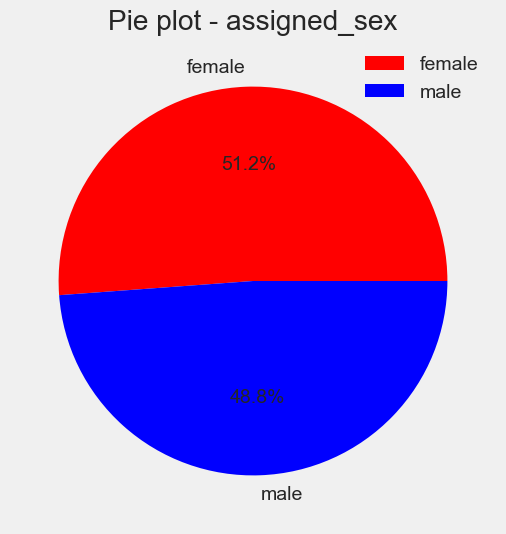

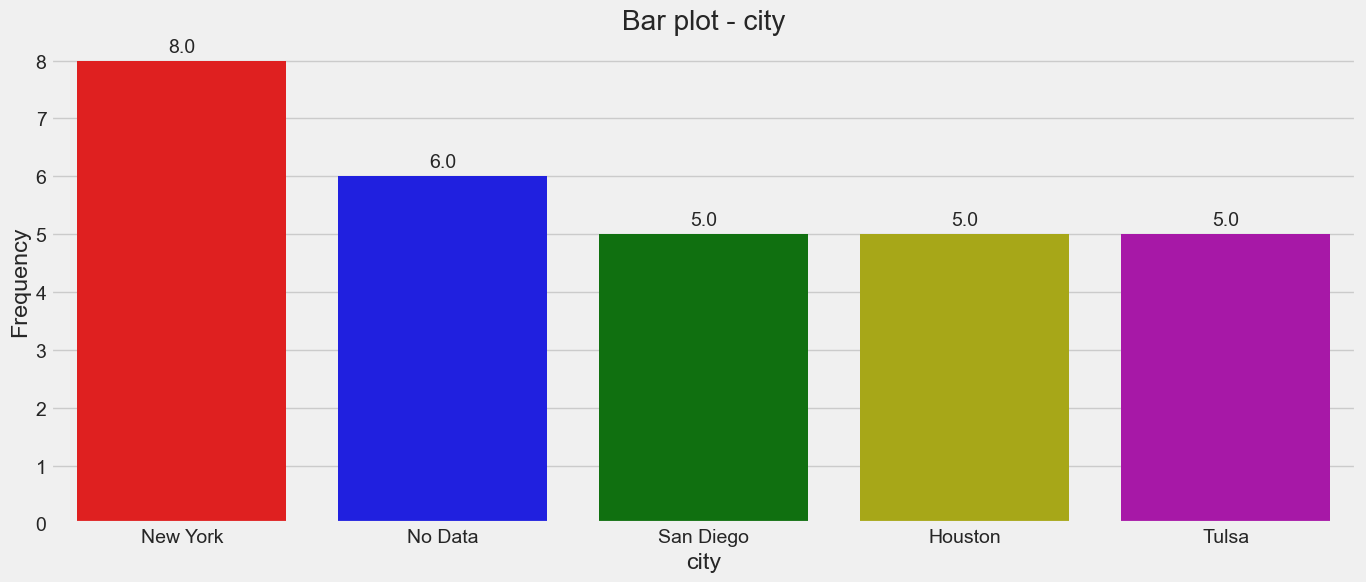

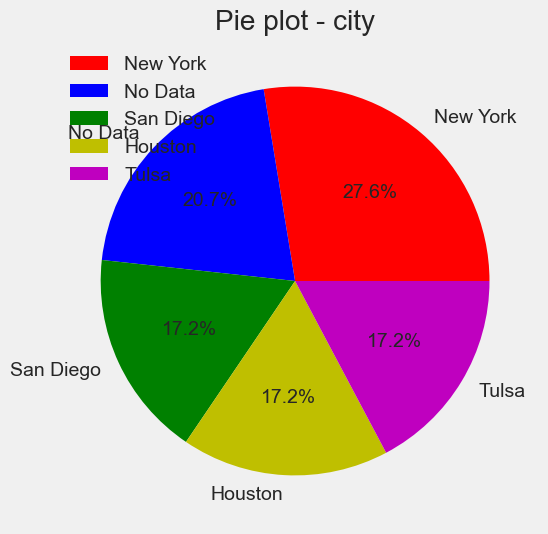

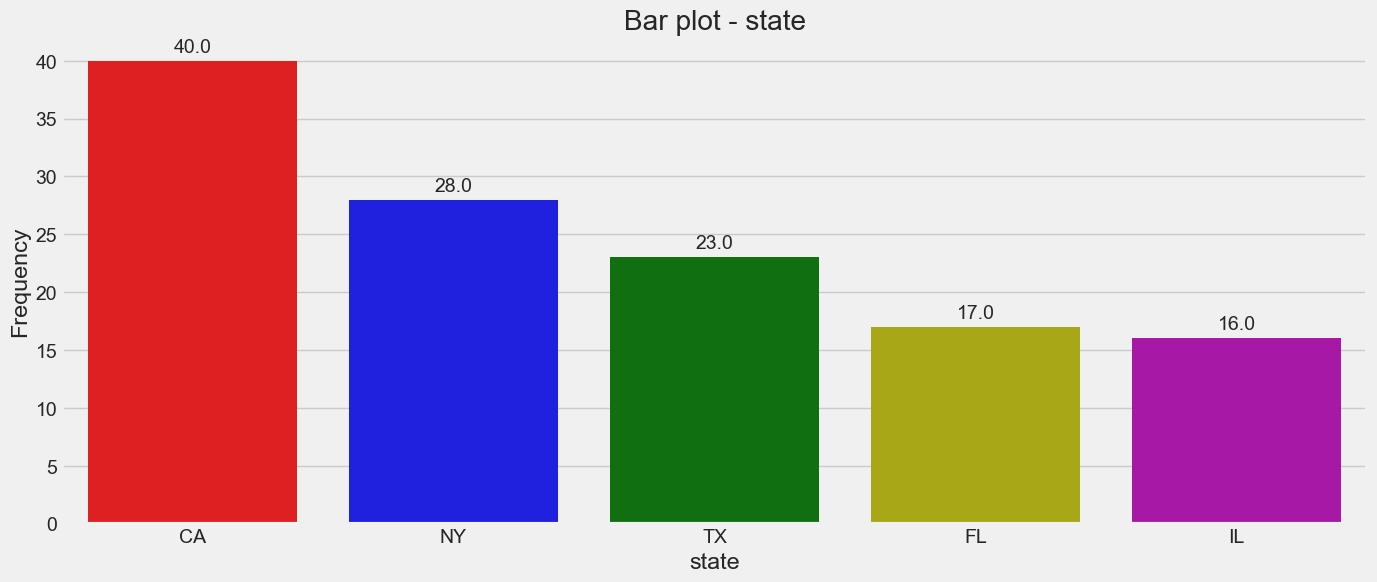

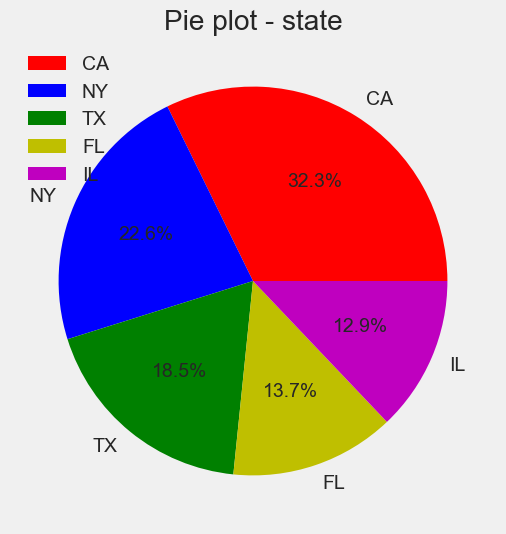

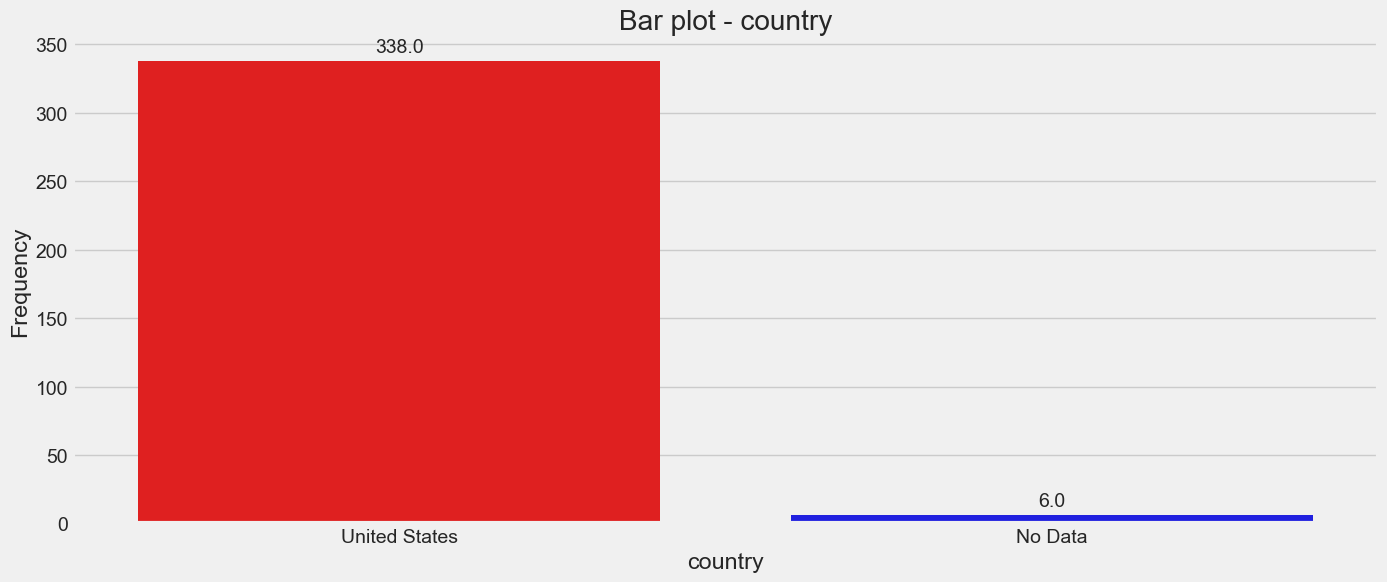

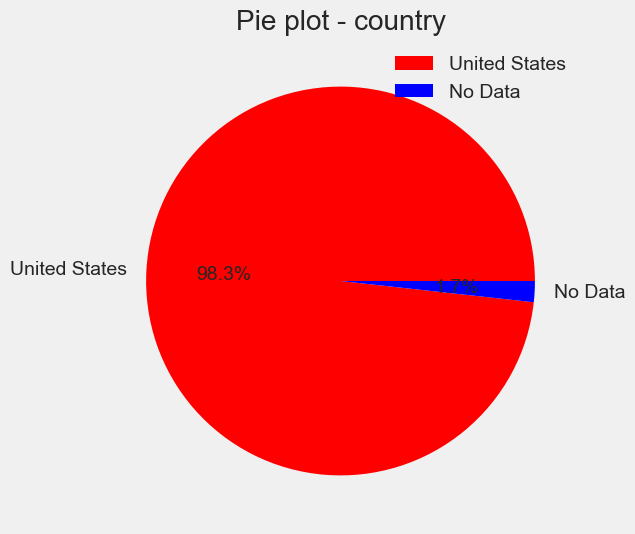

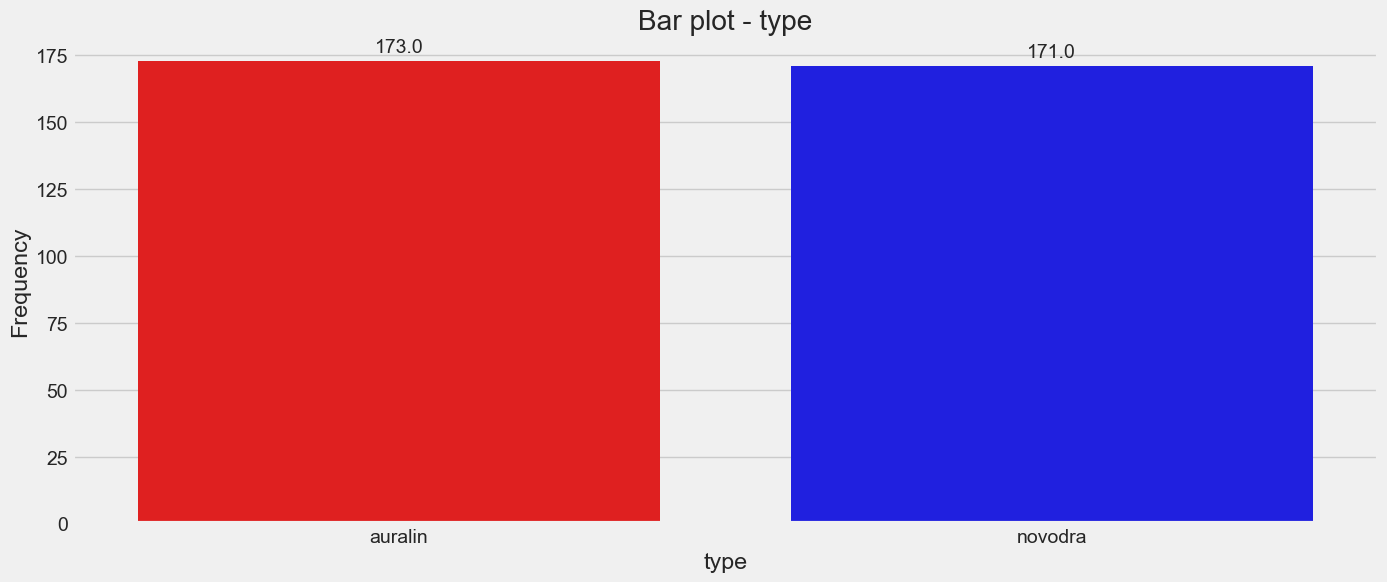

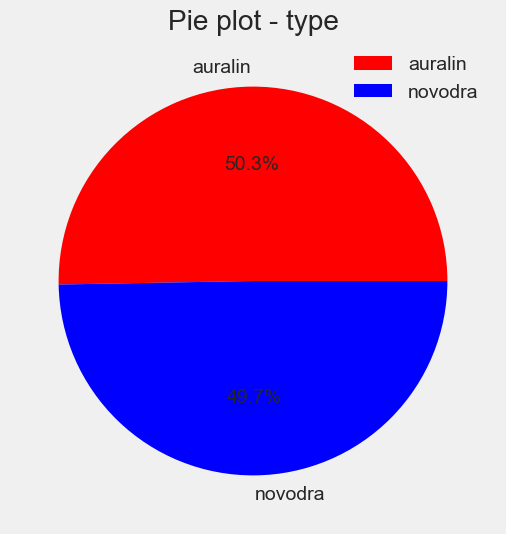

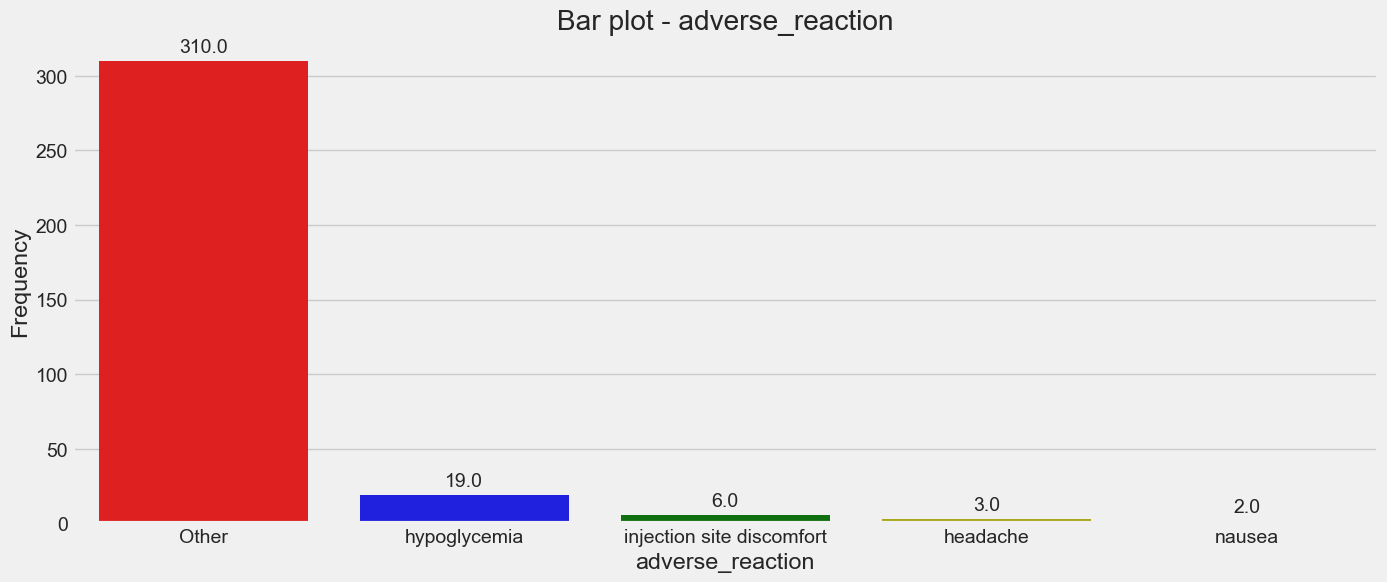

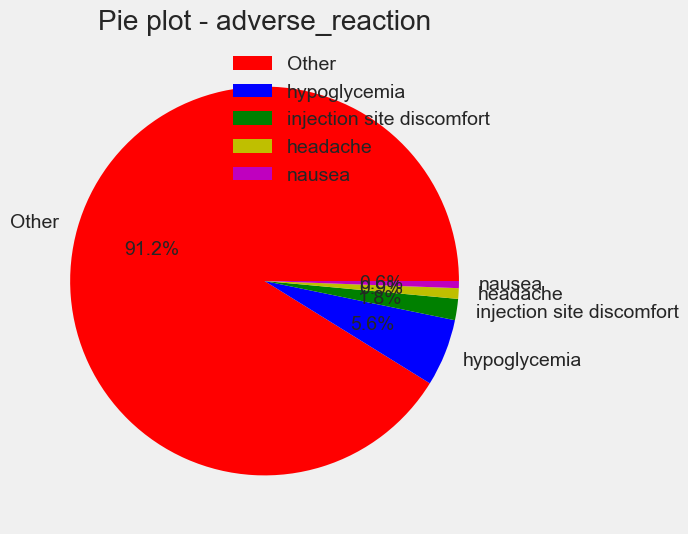

In [21]:
for col in categorical_columns:
    univariate_cat(data[col], bar_head=5, pie_head=5, figsize=(15, 6))

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insights:</b><br>
        <ul>
            <li>
                <b>assigned_sex:</b> 50.3% are male and 49.7% are female.
            </li>
            <li>
                <b>city:</b> Most patients are from New York (28.3%) City. 
            </li>
	        <li>
             <b>state:</b> Most patients are from states of CA (33.5%) and NY (22.9%). 
            </li>
            <li>
             <b>country:</b> Almost all patients are from the United states (97.6%) <code>imbalanced</code>
            </li>
            <li>
             <b>type:</b> 50% are auralin and 50% are novodra.
            </li>
        </ul>
    </span>
</div>


In [22]:
# Define a function to check if a column is imbalanced
def is_imbalanced(col, threshold=0.9):
    top_value_ratio = col.value_counts(normalize=True).max()
    return top_value_ratio >= threshold

# Identify imbalanced columns
imbalanced_columns = [col for col in data.columns if is_imbalanced(data[col])]

print("Imbalanced columns:", imbalanced_columns)

Imbalanced columns: ['country', 'adverse_reaction']


In [23]:
for name in imbalanced_columns:
    categorical_columns.remove(name)

<a id="univariate"></a>
<h2>   
      <font color = orange >
            <span style='font-family:Georgia'>
            4.2 Bivariate Analysis
            </span>   
        </font>    
</h2>

<a id="univariate"></a>
<h3>   
      <font color = purple >
            <span style='font-family:Georgia'>
            4.2.1 Numerical Vs Numerical
            </span>   
        </font>    
</h3>

In [25]:
def numerical_vs_numerical(data, num_col1, num_col2='bmi', figsize=(18, 12)):

    # Set up the subplot structure
    fig, axes = plt.subplots(1, 2, figsize=figsize)

    # Scatter plot with Plotly
    fig1 = px.scatter(data, x=num_col1, y=num_col2, color='bmi',
                     title=f'Scatter Plot: {num_col1} vs {num_col2}',
                     labels={num_col1: num_col1, num_col2: num_col2})
    fig1.show()

    # Line plot with Seaborn
    sns.lineplot(x=data[num_col1], y=data[num_col2], ax=axes[0])
    axes[0].set_title(f'Line Plot: {num_col1} vs {num_col2}')
    axes[0].set_xlabel(num_col1)
    axes[0].set_ylabel(num_col2)


    # Joint plot with regression
    sns.regplot(x=num_col1, y=num_col2, data=data, ax=axes[1], scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
    axes[1].set_title(f'Joint Plot: {num_col1} vs {num_col2}')
    axes[1].set_xlabel(num_col1)
    axes[1].set_ylabel(num_col2)
    
    plt.tight_layout()
    plt.show()
    
    # Correlation coefficient
    corr = data[[num_col1, num_col2]].corr().iloc[0, 1]

    print(f'Correlation between {num_col1} and {num_col2}: {corr:.2f}')
    print('\n' * 3)

In [26]:
print(numerical_columns)

['weight_lbs', 'height_in', 'bmi', 'hba1c_change']


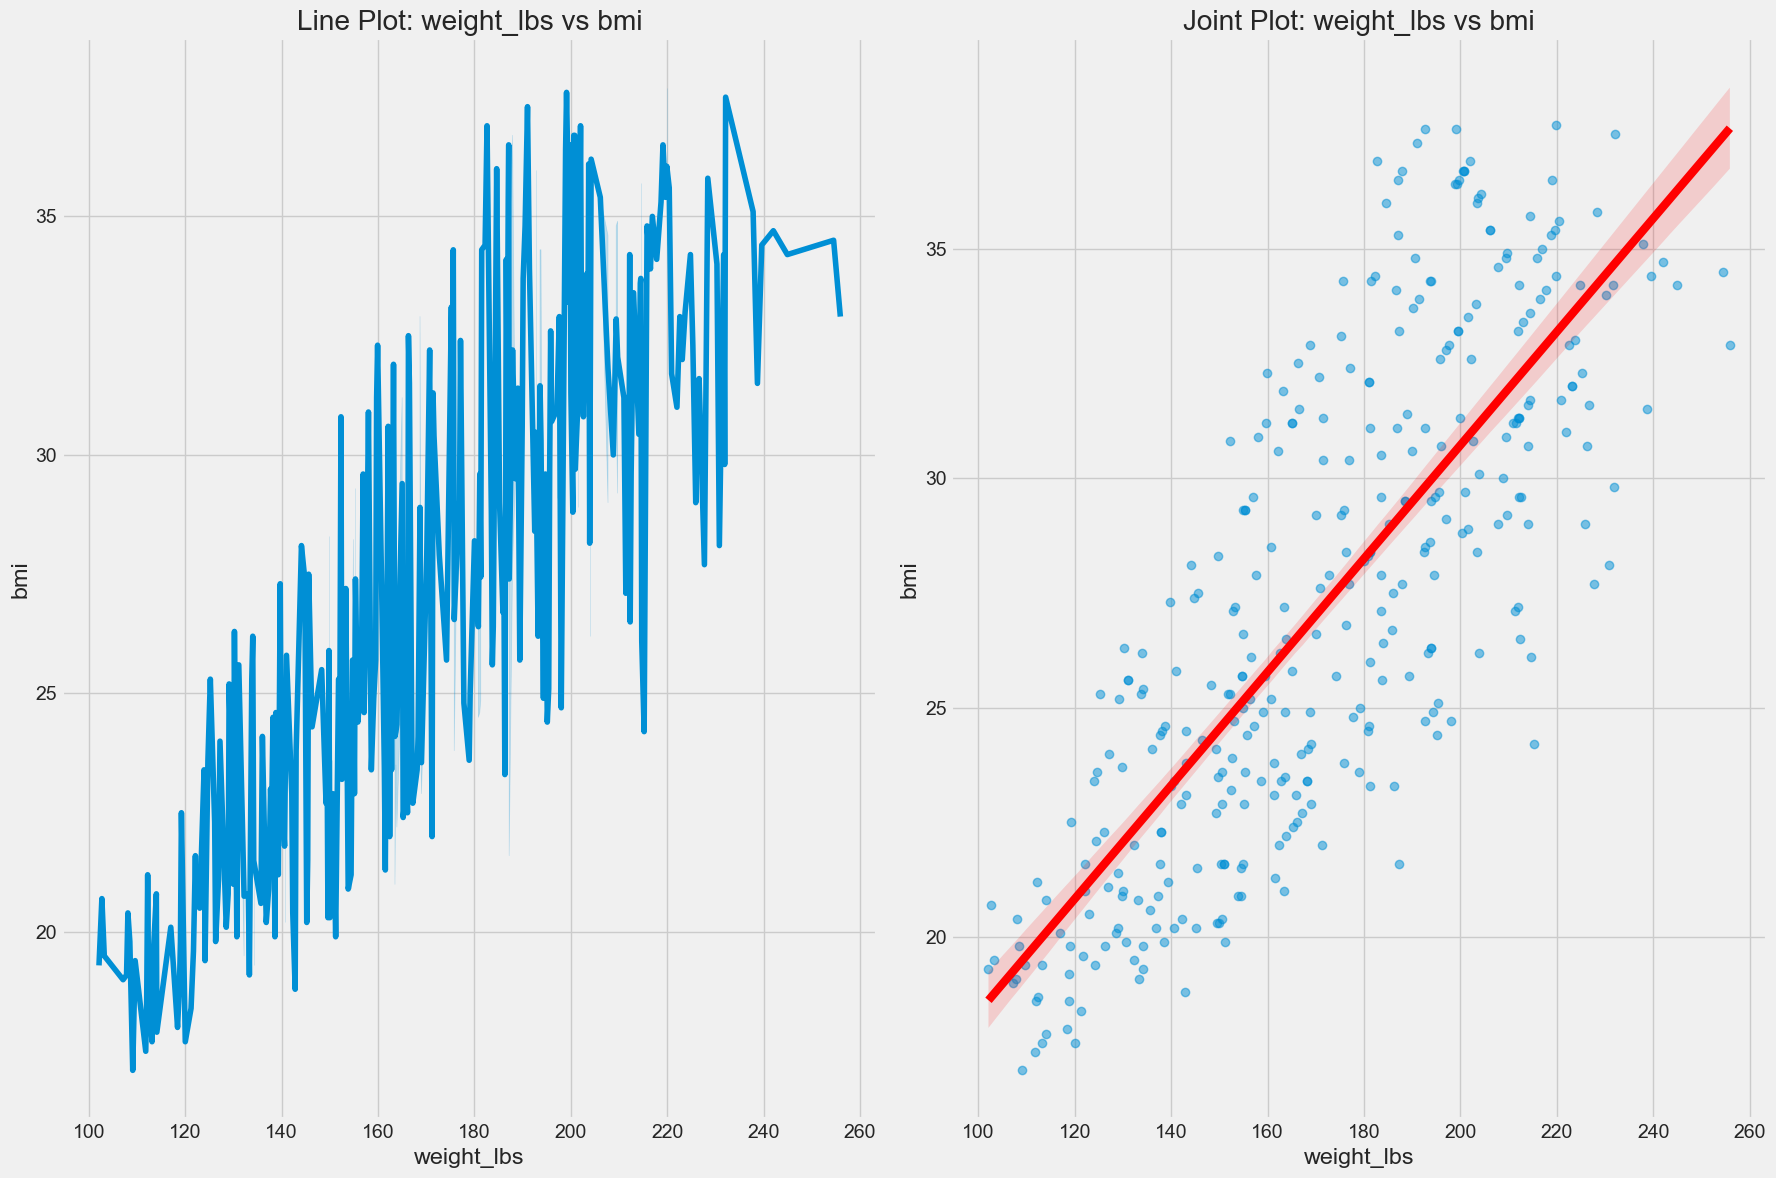

Correlation between weight_lbs and bmi: 0.79






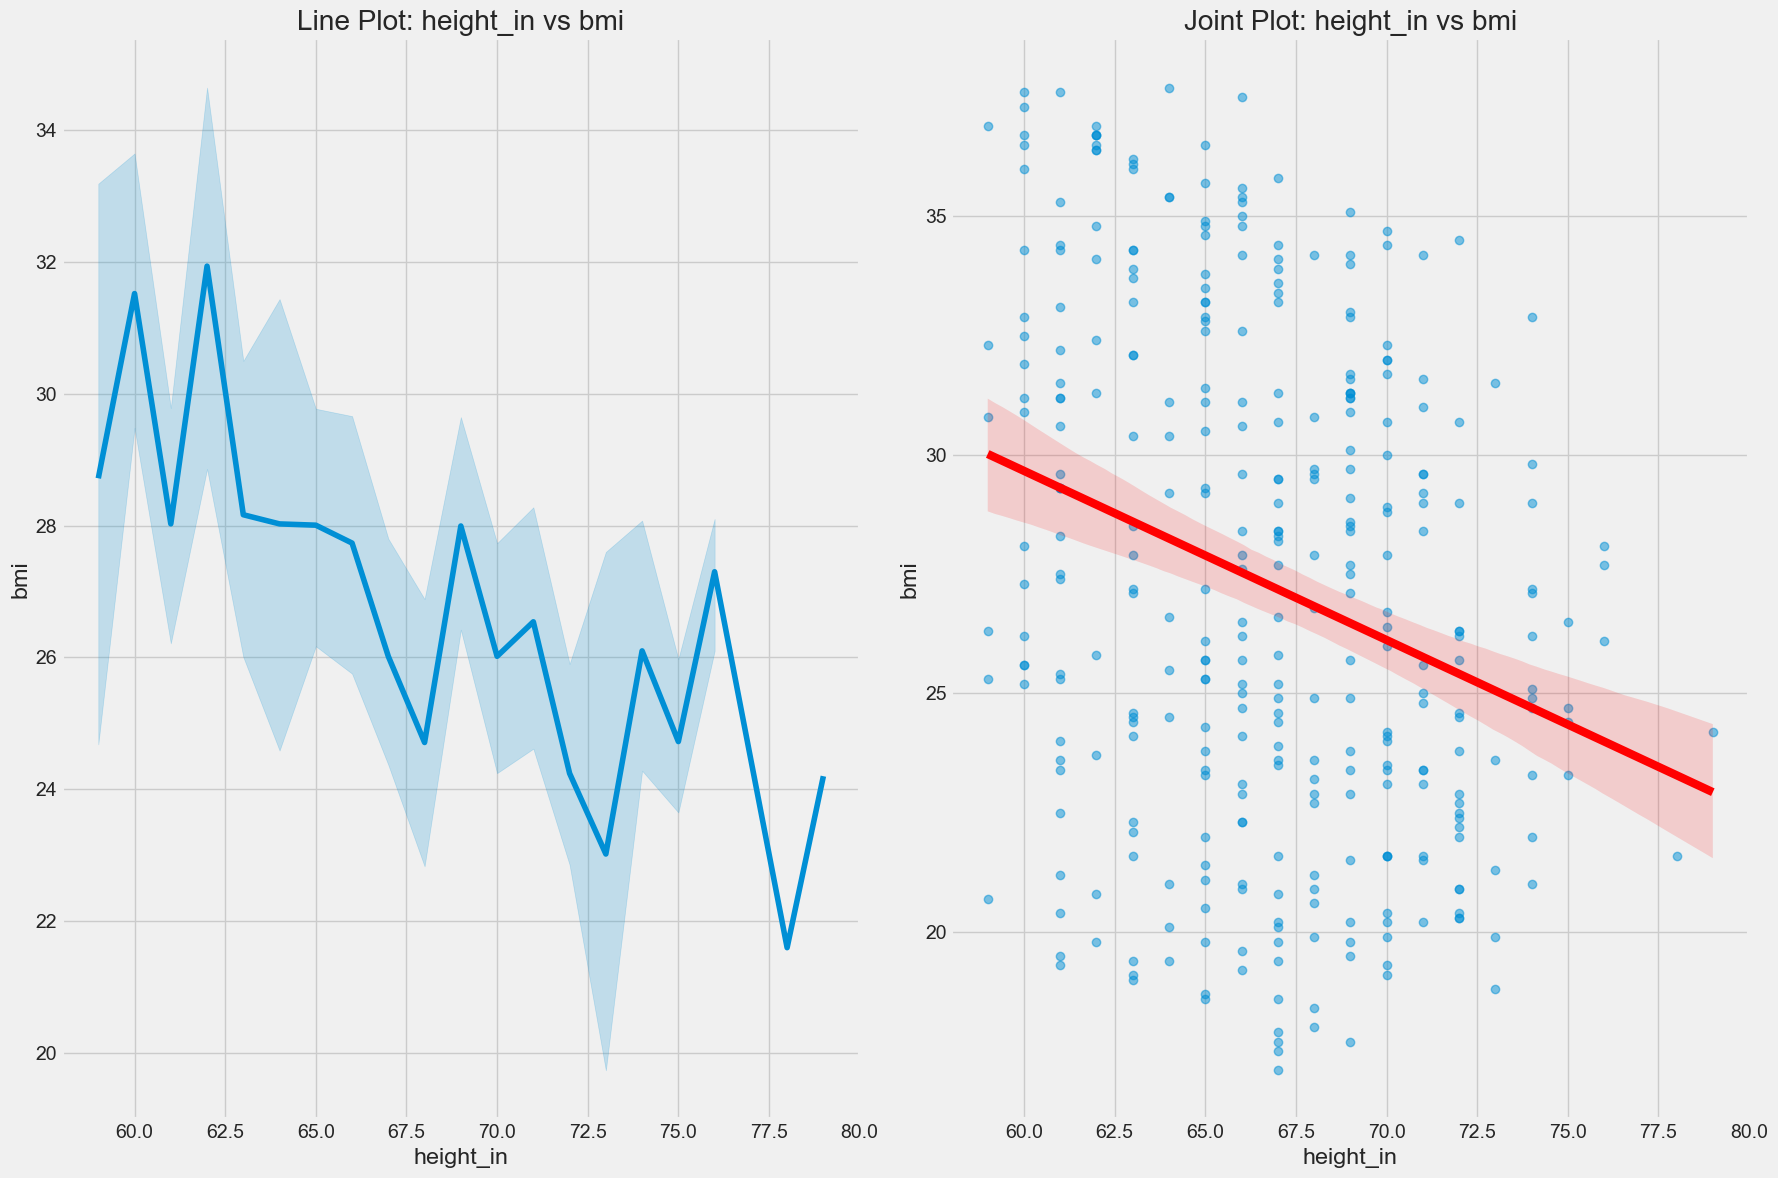

Correlation between height_in and bmi: -0.28






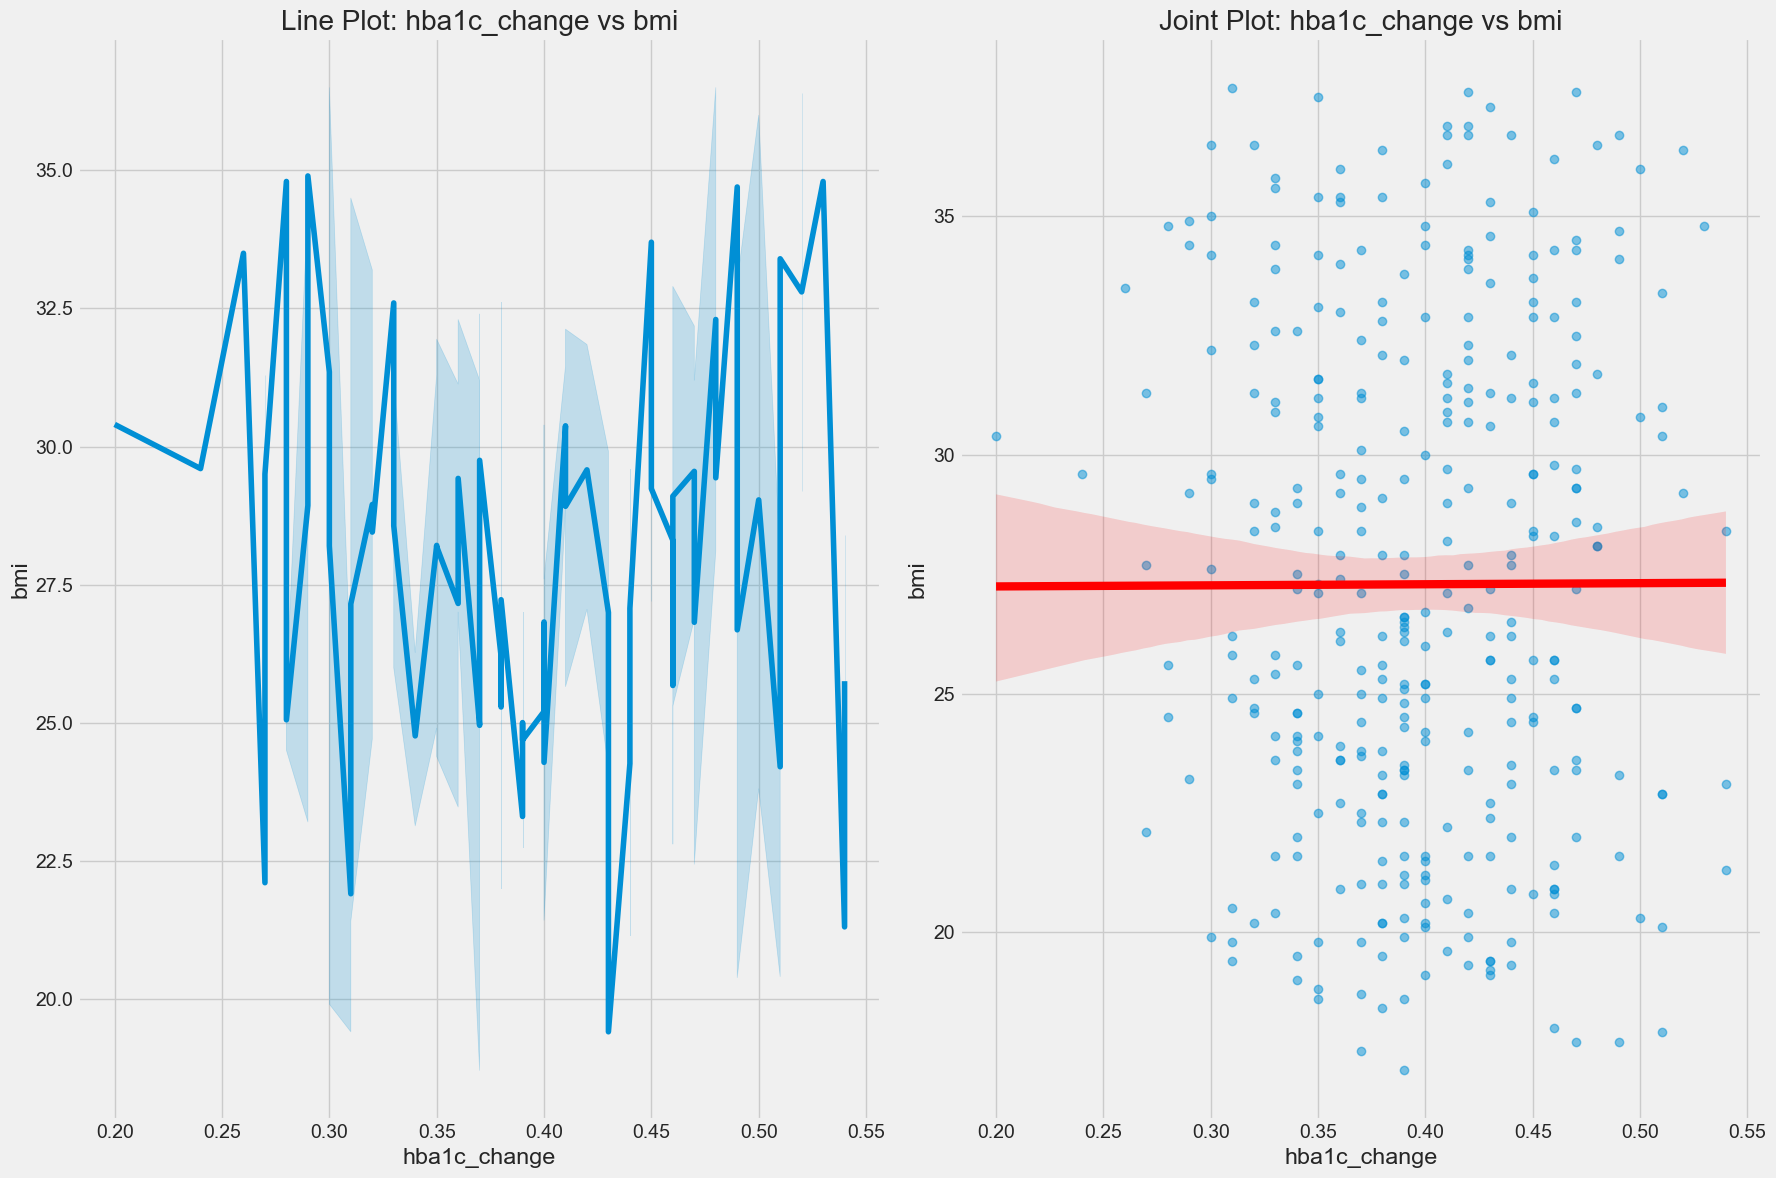

Correlation between hba1c_change and bmi: 0.00






In [27]:
for num_col in numerical_columns:
    if num_col != 'bmi':
        numerical_vs_numerical(data, num_col1=num_col, num_col2='bmi', figsize=(18, 12))

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insights:</b><br>
        <ul>
            <li>
                <b>Correlation between weight_lbs and bmi:</b> The correlation coefficient between weight_lbs and bmi is 0.80, indicating a very strong positive relationship. This suggests that weight_lbs is a significant predictor for the likelihood of filing a bmi in this dataset.
            </li>
            <li>
                <b>Correlation between height_in and bmi:</b> With a correlation coefficient of -0.27, there is a weaker negative relationship between height_in and bmi. This suggest that height_in is not a significant predictor of the likelihood of filing a bmi in this dataset.
            </li>
            <li>
                <b>Correlation between hba1c_change and bmi:</b> With a correlation coefficient of 0, there is no 
                correlation between these two.
            </li>
        </ul>
    </span>
</div>


<a id="univariate"></a>
<h3>   
      <font color = purple >
            <span style='font-family:Georgia'>
            4.2.2 Numerical Vs Categorical
            </span>   
        </font>    
</h3>

In [28]:
def numerical_vs_categorical(data, num_col, cat_col, figsize=(18, 12),colors=['r', 'b', 'g', 'y', 'm', 'c', 'k'], agg = 'count', hue = None):
    
    fig, axes = plt.subplots(2, 2, figsize=figsize)

    cols = data[cat_col].unique()
    if len(cols) > len(colors):
        colors = sns.color_palette("hsv", len(cols))

    # Box plot
    sns.boxplot(x=cat_col, y=num_col, data=data, ax=axes[0,0], hue = cat_col, palette=colors[:len(cols)], legend=False)
    axes[0, 0].set_title(f'Box Plot: {num_col} by {cat_col}')
    axes[0, 0].set_xlabel(cat_col)
    axes[0, 0].set_ylabel(num_col)
    
    # Violin plot
    sns.violinplot(x=cat_col, y=num_col, data=data, ax=axes[0, 1], hue = cat_col, palette=colors[:len(cols)], legend=False)
    axes[0, 1].set_title(f'Violin Plot: {num_col} by {cat_col}')
    axes[0, 1].set_xlabel(cat_col)
    axes[0, 1].set_ylabel(num_col)


    # Bar plot
    means = data.groupby(by=[cat_col])[num_col].agg(func = [agg]).reset_index()
    ax = sns.barplot(x=cat_col, y=agg, data=means, ax=axes[1, 0] , hue = cat_col, palette=colors[:len(cols)], legend=False)
    for p in ax.patches:
        ax.annotate(np.round(p.get_height(), decimals=2), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', 
                    va='center', 
                    xytext=(0, 10), 
                    textcoords='offset points')
        
    axes[1, 0].set_title(f'Bar Plot: Mean {num_col} by {cat_col}')
    axes[1, 0].set_xlabel(cat_col)
    axes[1, 0].set_ylabel(f'{agg} {num_col}')
    
    # swarm plot
    sns.stripplot(x=cat_col, y=num_col, data=data, ax=axes[1, 1], hue = cat_col , palette=colors[:len(cols)], legend=False)
    axes[1, 1].set_title(f'Swarm Plot: {num_col} by {cat_col}')
    axes[1, 1].set_xlabel(cat_col)
    axes[1, 1].set_ylabel(num_col)
    plt.tight_layout()
    plt.show()
    
    print('\n'*4)

In [29]:
categorical_columns

['assigned_sex', 'city', 'state', 'type']

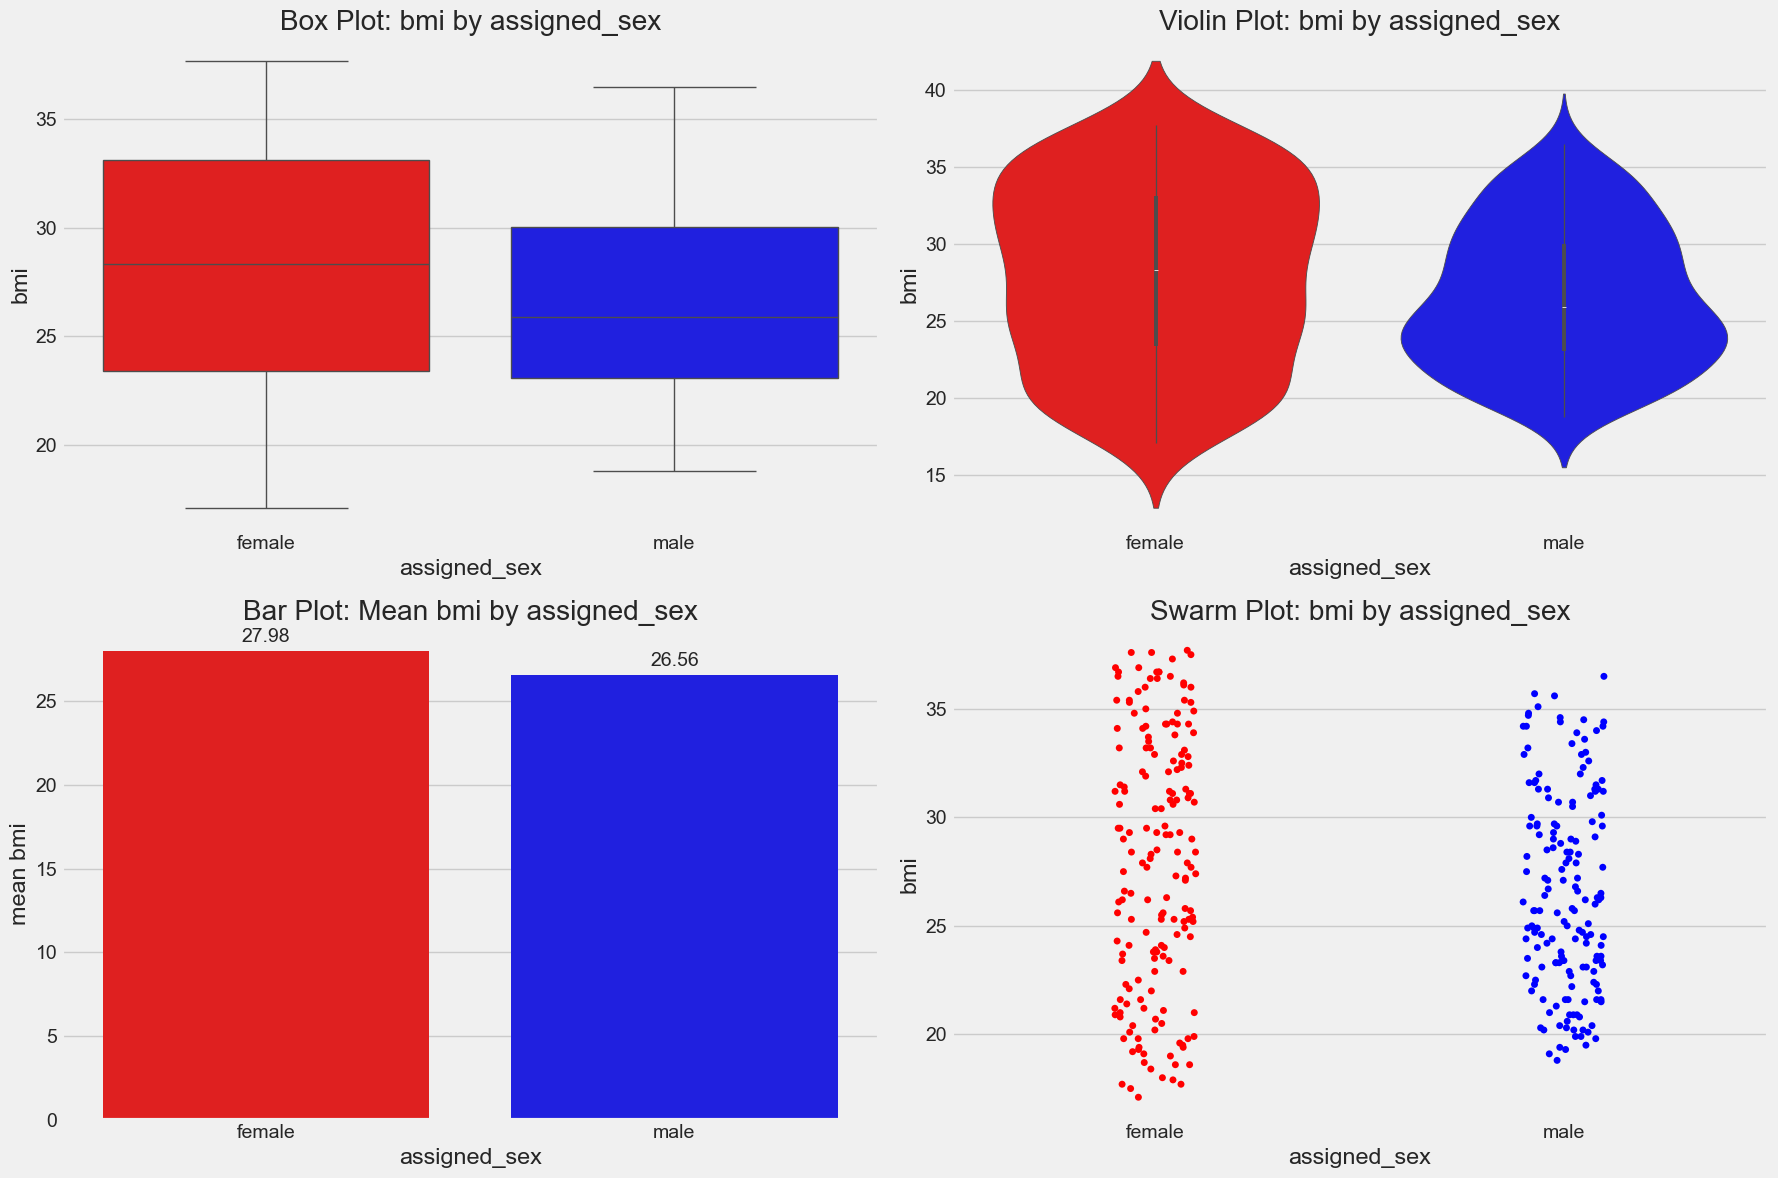

In [31]:
numerical_vs_categorical(data, num_col='bmi', cat_col='assigned_sex', agg = 'mean', figsize=(18, 12))

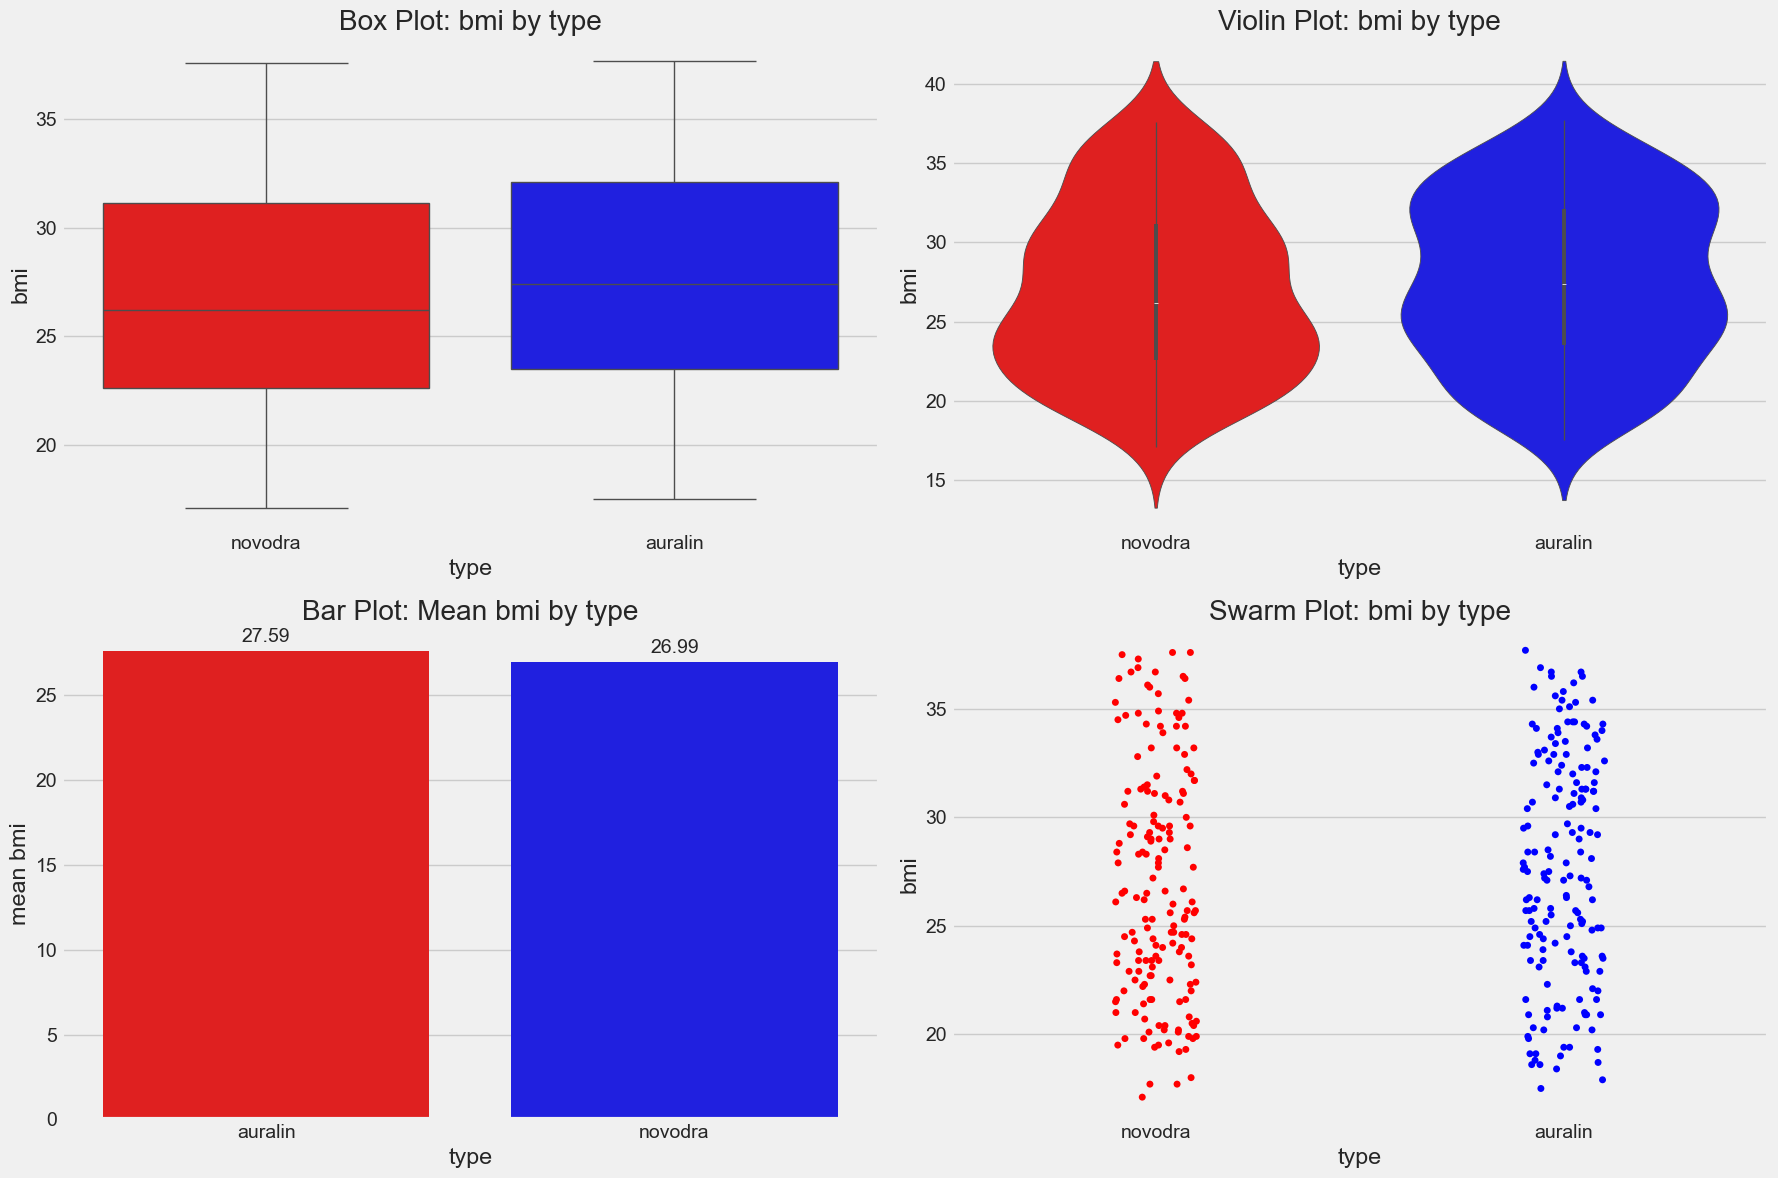

In [32]:
numerical_vs_categorical(data, num_col='bmi', cat_col='type', agg = 'mean', figsize=(18, 12))

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insights:</b><br>
        <ul>
            <li><b>bmi by assigned_sex:</b> The mean bmi for female (28.08) is slightly higher than male (26.95).</li>
            <li><b>bmi by type:</b> The mean bmi for auralin (27.59) and novodra (26.99) almost same.</li>
        </ul>
    </span>
</div>


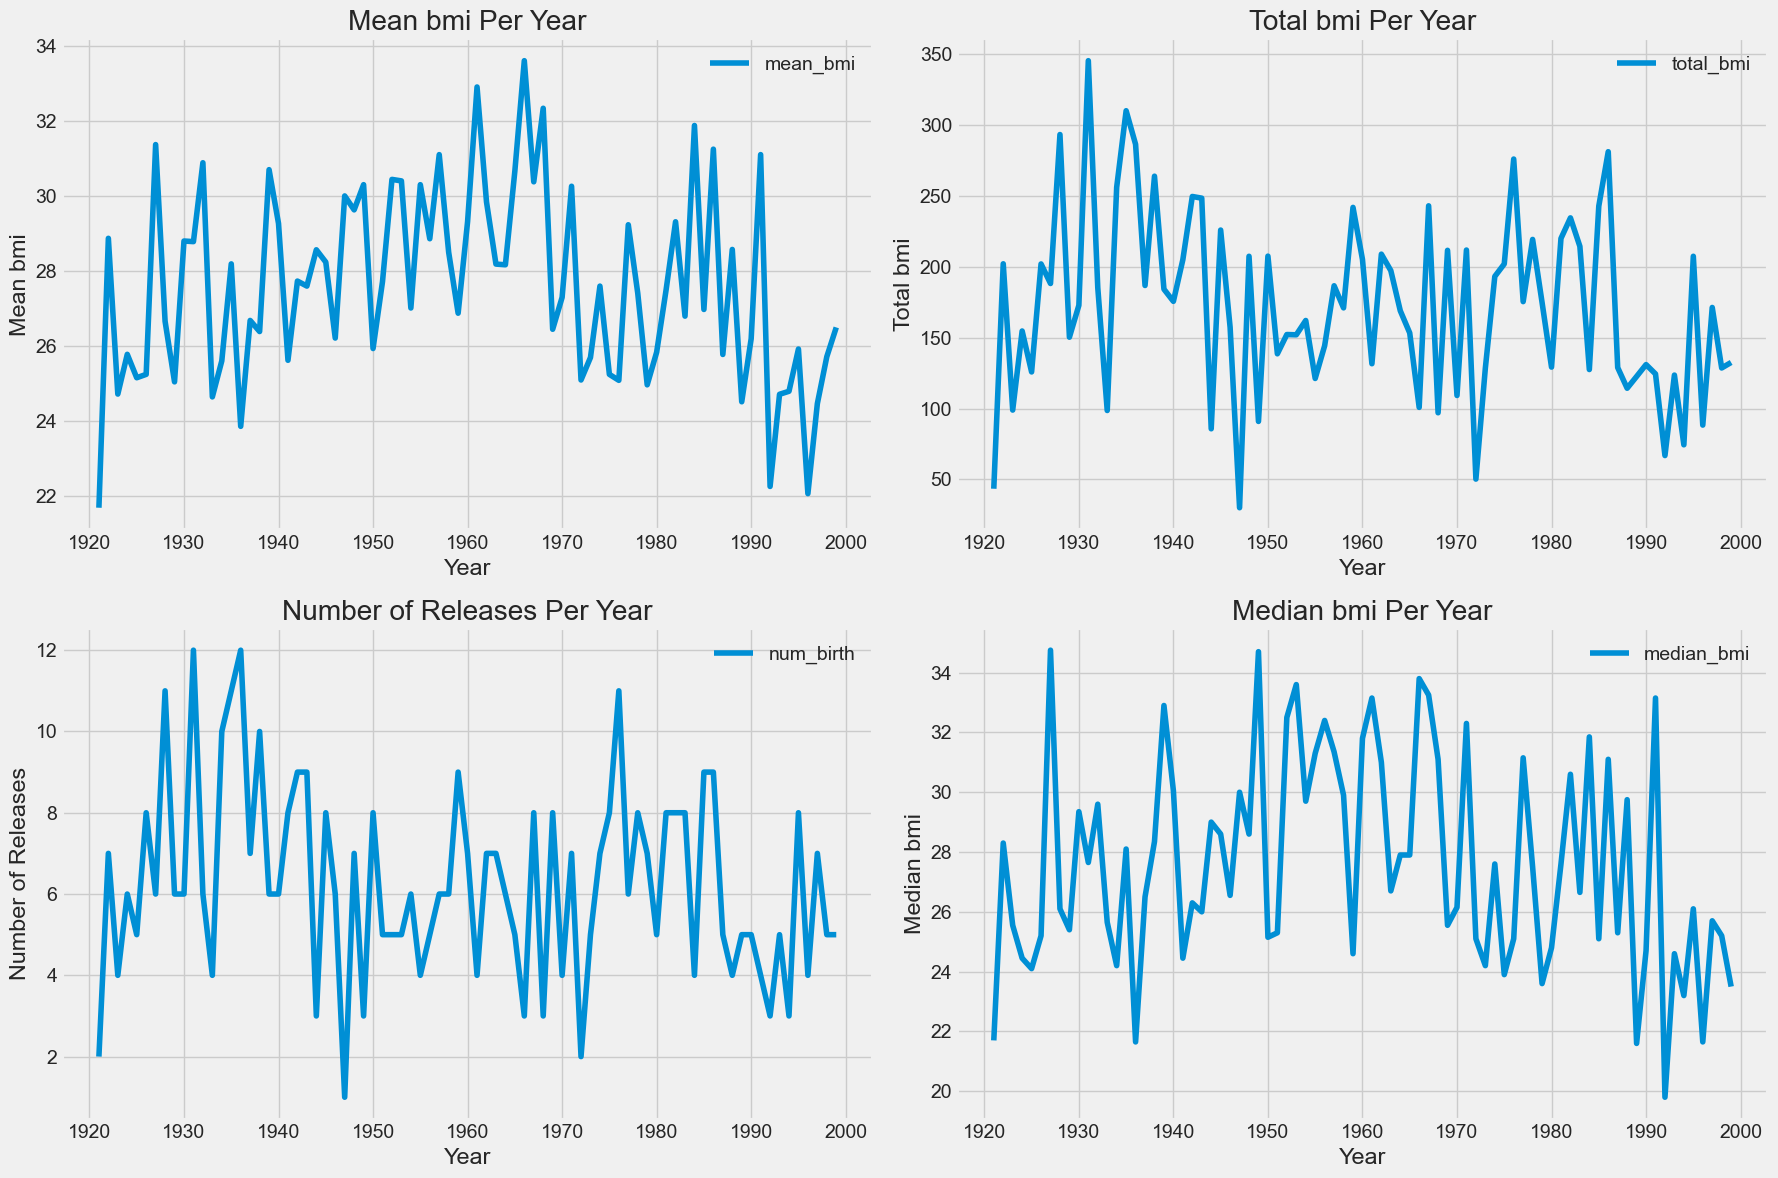

In [35]:

df1 = data.copy()

# Step 2: Set the 'birthdate' column as the index
df1.set_index('birthdate', inplace=True)

# Step 3: Prepare the data for each plot
year = data['birthdate'].dt.year

# Mean bmi per year
mean_bmi = data.groupby(year)['bmi'].mean().reset_index()
mean_bmi.columns = ['birthdate', 'mean_bmi']

# Total bmi per year
total_bmi = data.groupby(year)['bmi'].sum().reset_index()
total_bmi.columns = ['birthdate', 'total_bmi']

# Number of releases per year
num_birth = data.groupby(year).size().reset_index(name='num_birth')

# Median bmi per year
median_bmi = data.groupby(year)['bmi'].median().reset_index()
median_bmi.columns = ['birthdate', 'median_bmi']

# Step 4: Plot the data
fig, axs = plt.subplots(2, 2, figsize=(18, 12))

# Mean bmi per year
mean_bmi.plot(x='birthdate', y='mean_bmi', ax=axs[0, 0])
axs[0, 0].set_title('Mean bmi Per Year')
axs[0, 0].set_xlabel('Year')
axs[0, 0].set_ylabel('Mean bmi')

# Total bmi per year
total_bmi.plot(x='birthdate', y='total_bmi', ax=axs[0, 1])
axs[0, 1].set_title('Total bmi Per Year')
axs[0, 1].set_xlabel('Year')
axs[0, 1].set_ylabel('Total bmi')

# Number of releases per year
num_birth.plot(x='birthdate', y='num_birth', ax=axs[1, 0])
axs[1, 0].set_title('Number of Releases Per Year')
axs[1, 0].set_xlabel('Year')
axs[1, 0].set_ylabel('Number of Releases')

# Median bmi per year
median_bmi.plot(x='birthdate', y='median_bmi', ax=axs[1, 1])
axs[1, 1].set_title('Median bmi Per Year')
axs[1, 1].set_xlabel('Year')
axs[1, 1].set_ylabel('Median bmi')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


In [33]:
year = data['birthdate'].dt.year

# Create a pivot table with Mean BMI by assigned_sex and year
pivot_data = data.pivot_table(index=year, columns='assigned_sex', values='bmi', aggfunc='mean')

# Create a line plot using Plotly Express
fig = px.line(
    pivot_data, 
    x=pivot_data.index, 
    y=pivot_data.columns, 
    title='Mean BMI by assigned_sex and Year',
    labels={'x': 'Year', 'value': 'Mean BMI', 'variable': 'assigned_sex'}
)

# Customize the plot's appearance
fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Mean BMI',
    legend_title='assigned_sex',
    template='plotly_dark',  # Choose a suitable design template
    width=1200,
    height=600
)

# Show the plot
fig.show()

# Statistical Analysis

we can use an independent t-test to compare the means of the hba1c_change for the two drug types

assumptions of normality and equal variances (can use Levene's test for equal variances).

In [40]:
import pandas as pd
from scipy import stats

# Separate the data into two groups
auralin = data[data['type'] == 'auralin']['hba1c_change']
novodra = data[data['type'] == 'novodra']['hba1c_change']

# Perform the independent t-test
t_stat, p_value = stats.ttest_ind(auralin, novodra)

# Print the results
print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("There is a significant difference between the effects of 'auralin' and 'novodra'.")
    if auralin.mean() > novodra.mean():
        print("'Auralin' has a greater effect than 'novodra'.")
    else:
        print("'Novodra' has a greater effect than 'auralin'.")
else:
    print("There is no significant difference between the effects of 'auralin' and 'novodra'.")


T-statistic: -2.831507250555446
P-value: 0.004907142642488198
There is a significant difference between the effects of 'auralin' and 'novodra'.
'Novodra' has a greater effect than 'auralin'.


## ANOVA

<ul>ANOVA (Analaysis of Variance):
    <li>ANOVA is used to compare the means of three or more groups, but it can also be used for two groups. It tests the null hypothesis that the means of several groups are equal.</li>
    <li>For two groups, a one-way ANOVA gives the same result as a t-test.</li>
    <li>ANOVA assumes that the data follows a normal distribution and the variances are equal.</li>

</ul>

In [41]:
# Separate the data into two groups
auralin = data[data['type'] == 'auralin']['hba1c_change']
novodra = data[data['type'] == 'novodra']['hba1c_change']

# Perform the ANOVA test
f_stat, p_value = stats.f_oneway(auralin, novodra)

# Print the results
print(f'F-statistic: {f_stat}')
print(f'P-value: {p_value}')

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("There is a significant difference between the effects of 'auralin' and 'novodra'.")
else:
    print("There is no significant difference between the effects of 'auralin' and 'novodra'.")


F-statistic: 8.017433309948013
P-value: 0.004907142642488732
There is a significant difference between the effects of 'auralin' and 'novodra'.


## Mann-Whitney U Test

<ul>Mann-Whitney U Test:
    <li> This is a non-parametric test that does not assume a normal distribution. It compares the medians of two independent groups.</li>
    <li>Useful if the assumption of normality is violated.</li>

</ul>

In [42]:
# Separate the data into two groups
auralin = data[data['type'] == 'auralin']['hba1c_change']
novodra = data[data['type'] == 'novodra']['hba1c_change']

# Perform the Mann-Whitney U test
u_stat, p_value = stats.mannwhitneyu(auralin, novodra, alternative='two-sided')

# Print the results
print(f'U-statistic: {u_stat}')
print(f'P-value: {p_value}')

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("There is a significant difference between the effects of 'auralin' and 'novodra'.")
else:
    print("There is no significant difference between the effects of 'auralin' and 'novodra'.")


U-statistic: 11872.0
P-value: 0.0015390701955065851
There is a significant difference between the effects of 'auralin' and 'novodra'.
